Collecting all the necessary functions form packages

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from skimage.color import rgb2hsv, hsv2rgb, rgb2lab, deltaE_cie76
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

Finding and showing the example image

(-0.5, 1079.5, 719.5, -0.5)

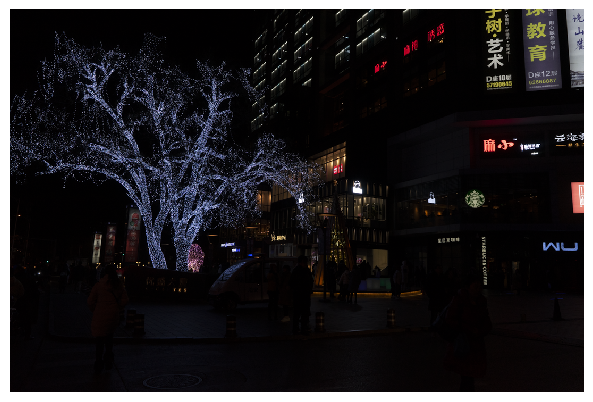

In [35]:
im_name = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_2.png"
im_org = io.imread(im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [36]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)

Histogram equalization of the value channel

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

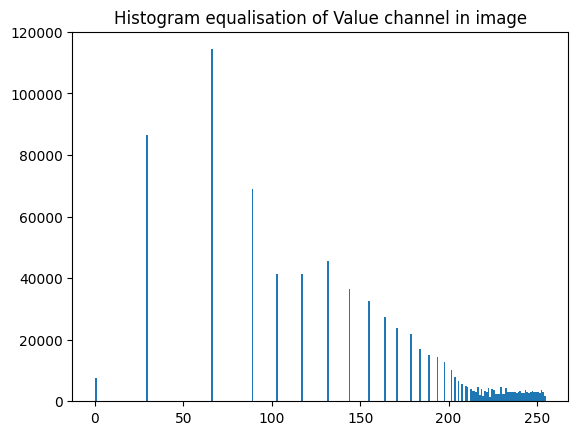

In [37]:
V_hist = cv.equalizeHist(V)

plt.figure()

plt.hist(V_hist.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Check for constrast level in image

In [38]:
V_comp = (V_hist < V) * V
V_compMax = np.max(V_comp) / 255

if V_compMax > 0.1 and V_compMax < 0.6:
    th = 0.6
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 3
elif V_compMax > 0.6 and V_compMax < 1:
    th = 1
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 2.2
elif V_compMax > 0 and V_compMax < 0.1:
    th = 1
    V_1 = V.copy()
    V_2 = V.copy()
    gamma = 1.6
else:
    th = 1
    V_1 = V_hist.copy()
    V_2 = V_hist.copy()
    gamma = 1.6

Calculate the enhanced image

In [39]:
V_llp = ((V_1 / 255) <= th) * V_2
V_op = ((V_1 / 255) >= th) * V_2
V_llpup = 255 * ((V_llp / 255) ** (1 / gamma))
V_enh = V_llpup + V_op

Transform the enhanced image back to RGB

(-0.5, 1079.5, 719.5, -0.5)

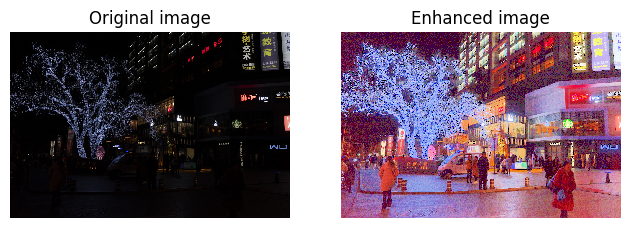

In [40]:
im_hsv[:, :, 2] = V_enh / 255
im_enh = hsv2rgb(im_hsv)
im_enh = np.uint8(im_enh * 255)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Plotting the final histograms

Text(0.5, 1.0, 'Histogram of the enhanced image')

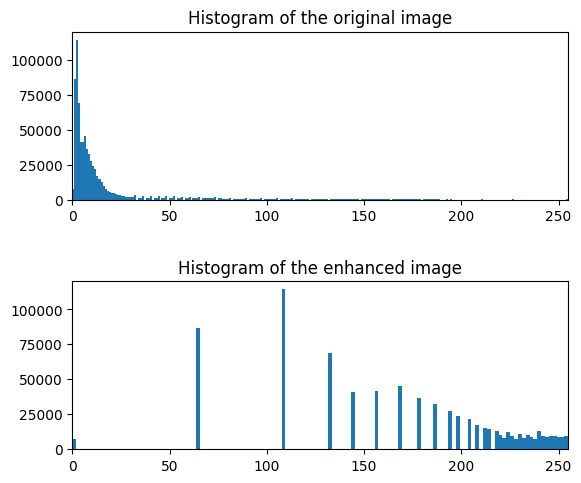

In [41]:
figs, ax = plt.subplots(2, 1)

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.xlim((0, 255))
plt.title("Histogram of the original image")

plt.subplot(2, 1, 2)
plt.hist(V_enh.ravel(), bins = 256)
plt.xlim((0, 255))
pos = ax[1].get_position()
new_pos = [pos.x0, pos.y0 - 0.1, pos.width, pos.height]
ax[1].set_position(new_pos)
plt.title("Histogram of the enhanced image")

Evaluation with SSIM, PSNR and DeltaE

SSIM result:	0.08309894681974142
PSNR result:	4.453863074578698
Delta_E average result:	57.61447399634382


Text(0.5, 1.0, '$\\Delta$E as an image')

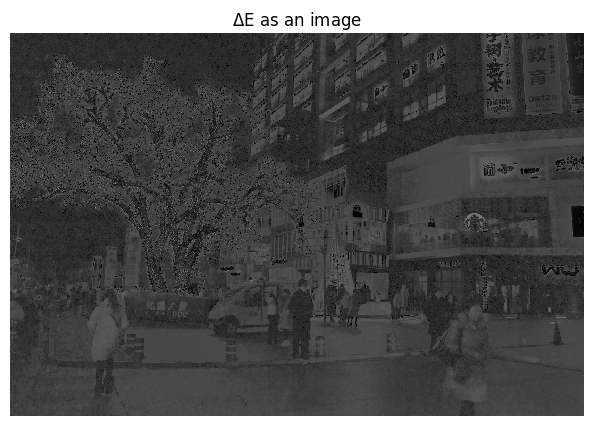

In [42]:
eval_ssim = ssim(V, np.uint8(V_enh))
eval_psnr = psnr(V, np.uint8(V_enh))
im_orgLAB = rgb2lab(im_org)
im_enhLAB = rgb2lab(im_enh)
eval_coldif = deltaE_cie76(im_orgLAB, im_enhLAB)

print("SSIM result:\t" + str(eval_ssim) + "\nPSNR result:\t" + str(eval_psnr) + "\nDelta_E average result:\t" + str(np.mean(eval_coldif)))

plt.figure()
io.imshow(np.uint8(np.round(eval_coldif)))
plt.axis("off")
plt.title(r"$\Delta$E as an image")

Save images

In [43]:
save_image = False

if save_image:
    io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/IllAdj_Res.png", im_enh)
    io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/IllAdj_DeltaE.png", np.uint8(np.round(eval_coldif)))

Trying out with YCbCr color space

In [44]:
try_out = False

if try_out:
    from skimage.color import rgb2ycbcr, ycbcr2rgb

    im_ycbcr = rgb2ycbcr(im_org)
    Y = im_ycbcr[:, :, 0]
    hist, _ = np.histogram(Y.ravel(), bins = 256)

    Y_hist = 235 * hist.cumsum() / np.sum(hist)
    Y_hist = cv.LUT(np.uint8(Y), Y_hist)

    Y_comp = (Y_hist < Y) * Y
    Y_compMax = np.max(Y_comp) / 235

    if Y_compMax > 0.1 and Y_compMax < 0.6:
        th = 0.6
        Y_1 = Y.copy()
        Y_2 = Y_hist.copy()
        gamma = 3
    elif Y_compMax > 0.6 and Y_compMax < 1:
        th = 1
        Y_1 = Y.copy()
        Y_2 = Y_hist.copy()
        gamma = 2.2
    elif Y_compMax > 0 and Y_compMax < 0.1:
        th = 1
        Y_1 = Y.copy()
        Y_2 = Y.copy()
        gamma = 1.6
    else:
        th = 1
        Y_1 = Y_hist.copy()
        Y_2 = Y_hist.copy()
        gamma = 1.6

    Y_llp = ((Y_1 / 235) <= th) * Y_2
    Y_op = ((Y_1 / 235) >= th) * Y_2
    Y_llpup = 235 * ((Y_llp / 235) ** (1 / gamma))
    Y_enh = Y_llpup + Y_op

    im_ycbcr[:, :, 0] = Y_enh
    im_enh = ycbcr2rgb(im_ycbcr)
    im_enh = np.uint8(im_enh * 255)

    plt.figure()

    plt.subplot(1, 2, 1)
    io.imshow(im_org)
    plt.title("Original image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    io.imshow(im_enh)
    plt.title("Enhanced image")
    plt.axis("off")